In [1]:
from dask.distributed import Client, progress
client = Client(n_workers=4, threads_per_worker=2, memory_limit='4GB')
client

Client Scheduler: tcp://127.0.0.1:38009 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 16.00 GB


In [2]:
import dask
import pandas as pd
import dask.dataframe as dd
from pathlib import Path

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [4]:
plt.style.use('seaborn')  # Just changes plotting theme, comment out if annoying\n
matplotlib.rcParams['figure.figsize'] = [14, 8]

In [5]:
data_p = Path('/home/zach/Downloads')

In [6]:
listings = dd.read_parquet(data_p/'listings2.parquet')

In [7]:
listings.npartitions

755

In [11]:
boston = listings[listings.city == 'Boston']

In [17]:
boston.compute().head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,property_type
23562,3781,https://www.airbnb.com/rooms/3781,20190922191643,2019-09-22,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,super_strict_30,f,f,2,2,0,0,0.29,Apartment
23564,6976,https://www.airbnb.com/rooms/6976,20190922191643,2019-09-22,Mexican Folk Art Showcase in Boston Neighborhood,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,f,moderate,t,f,1,0,1,0,0.67,Apartment
23566,8789,https://www.airbnb.com/rooms/8789,20190922191643,2019-09-22,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,strict_14_with_grace_period,f,f,10,10,0,0,0.37,Apartment
23568,9273,https://www.airbnb.com/rooms/9273,20190922191643,2019-09-22,"Stay at ""HARBORVIEW"" Walk to subway",None,Available $200.00 per night/seven night minim...,Available $200.00 per night/seven night minim...,none,None,...,f,super_strict_30,f,f,2,2,0,0,0.13,Apartment
23570,10730,https://www.airbnb.com/rooms/10730,20190922191643,2019-09-22,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",Bright one bed facing the golden dome of the S...,"Bright, spacious unit, new galley kitchen, new...",none,Beacon Hill is located downtown and is conveni...,...,f,strict_14_with_grace_period,f,f,10,10,0,0,0.25,Apartment


In [12]:
types_and_hoods = boston[['neighbourhood', 'property_type', 'id']]\
    .groupby(['neighbourhood', 'property_type'])\
    .count()

Filter out very rare property types where count < 5 (i.e. barns)

In [13]:
types_and_hoods = types_and_hoods[types_and_hoods.id >= 5]

In [1]:
types_and_hoods.compute().head()

NameError: name 'types_and_hoods' is not defined

In [18]:
toplot = types_and_hoods.compute().unstack()

Text(0.5, 1.0, 'Count of Property Types by Neighborhood')

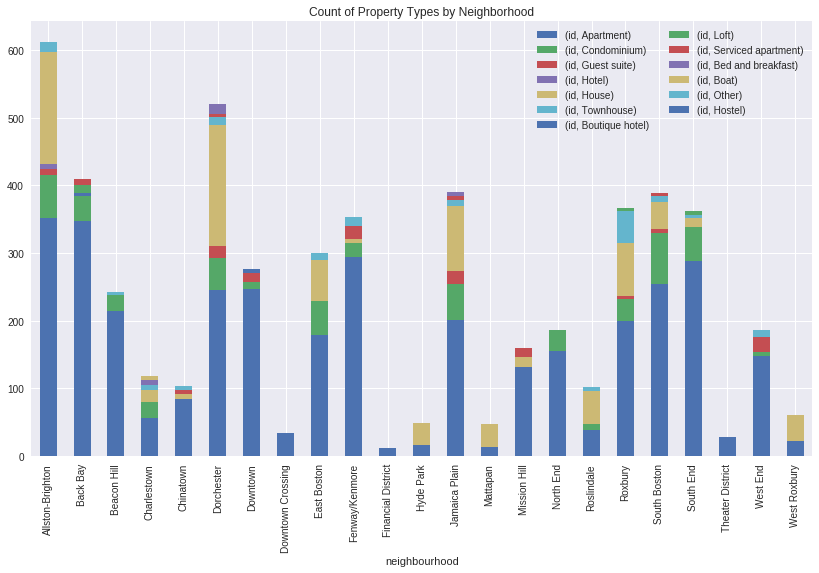

In [34]:
ax = toplot.plot(kind='bar', stacked=True)
fig = ax.get_figure()
plt.legend(loc='upper right', ncol=2)
plt.title('Count of Property Types by Neighborhood')

In [35]:
fig.savefig("figs/properties_by_neighbourhood.png")

# Reviews Sentiment Analysis

### Idea:
Measure by mean z-score of reviews per word

1. Join ratings to reviews on listing id
2. Determine mean and standard deviation of ratings
3. Calculate the z-score of each review, and assign this value to all words in that review
4. Take the mean of the z-scores for each unique word

Benefits:
Words like "The", "and", "apartment" etc. will be in both positive and negative reviews and will thus have very average mean z-scores, not appearing at the top or bottom

In [ ]:
listings.head(5)

In [7]:
reviews = dd.read_parquet(data_p/'reviews2.parquet')

In [9]:
review_scores = dd.merge(listings['', reviews, left_on="id", right_on="listing_id")

In [ ]:
review_scores['z-score'] = review_scores.